## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [1]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv("../input/starbucks-customer-data/transcript.csv")
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [3]:
profile = pd.read_csv("../input/starbucks-customer-data/profile.csv")
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [4]:
portfolio = pd.read_csv("../input/starbucks-customer-data/portfolio.csv")
portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [5]:
# 각 데이터에 결측치가 있는지 확인합니다.
transcript.isnull()

,Unnamed: 0,person,event,value,time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
306529,False,False,False,False,False
306530,False,False,False,False,False
306531,False,False,False,False,False
306532,False,False,False,False,False


In [6]:
profile.isnull()

,Unnamed: 0,gender,age,id,became_member_on,income
0,False,True,False,False,False,True
1,False,False,False,False,False,False
2,False,True,False,False,False,True
3,False,False,False,False,False,False
4,False,True,False,False,False,True
...,...,...,...,...,...,...
16995,False,False,False,False,False,False
16996,False,False,False,False,False,False
16997,False,False,False,False,False,False
16998,False,False,False,False,False,False


In [7]:
portfolio.isnull()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [8]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
transcript.isnull().sum()

Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

In [9]:
transcript.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
306529    0
306530    0
306531    0
306532    0
306533    0
Length: 306534, dtype: int64

In [10]:
profile.isnull().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [11]:
profile.isnull().sum(axis=1)

0        2
1        0
2        2
3        0
4        2
        ..
16995    0
16996    0
16997    0
16998    0
16999    0
Length: 17000, dtype: int64

In [12]:
portfolio.isnull().sum()

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [13]:
portfolio.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [14]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
final_transcript = transcript.dropna()
final_transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [15]:
final_profile = profile.dropna()
final_profile
#final_profile.dtypes

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [16]:
final_portfolio = portfolio.dropna()
final_portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [17]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
#final_profile.became_member_on = pd.to_datetime(final_profile.became_member_on.astype(str), format='%Y%m%d')
#final_profile.info()
final_profile.dtypes

Unnamed: 0            int64
gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

#### 성별에 관한 분석

In [18]:
#final_profile['gender']
gender = final_profile['gender'][1:]
gender.value_counts()

M    8484
F    6128
O     212
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

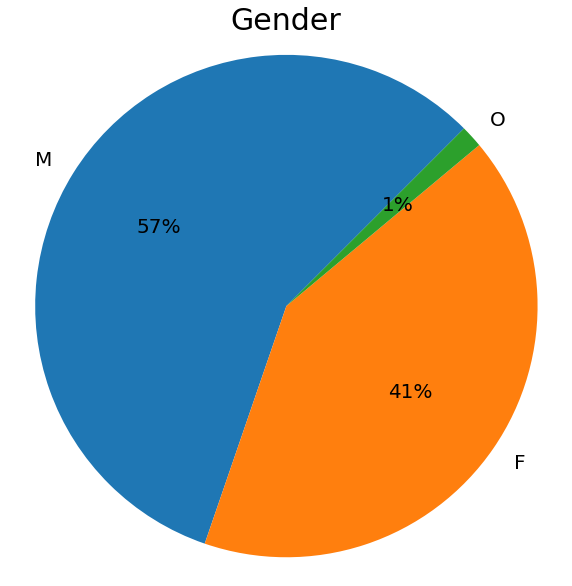

In [19]:
#plt.figure(figsize=(16, 16))
#plt.title("Gender")
#plt.hist(gender)
#plt.show()

plt.figure(figsize=(10, 10))
plt.pie(gender.value_counts(),
       labels=gender.value_counts().index,
       autopct='%d%%',
       startangle=45,
       textprops={'fontsize':20})
plt.axis('equal')
plt.title("Gender", fontsize=30)

> 해당 설문 조사에서 스타벅스 회원 중 남성이 여성에 비해 과반수 이상 참여하였습니다.

#### 나이에 대한 분석

In [20]:
#final_profile['age']
age = final_profile['age'][1:]
age.value_counts()
#set(final_profile['age'])

58     408
53     372
51     363
59     359
54     359
      ... 
100     12
96       8
98       5
101      5
99       5
Name: age, Length: 84, dtype: int64

평균 나이는 : 54.39352445193929


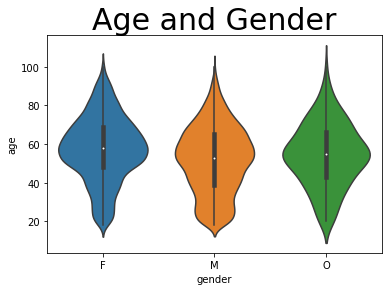

In [21]:
plt.title("Age and Gender", fontsize=30)
sns.violinplot(data=age, y=age, x=gender)
print("평균 나이는 : {}".format(final_profile['age'].mean()))

> 설문 조사 바탕으로 성별에 따른 나이 분석 결과, 설문에 참여한 여성 회원수는 40대에서 급격한 증가를 보여주면서 50대 후반, 60대 초반의 회원수가 여성 내 큰 비중을 차지하고 있습니다.

> 남성은 여성에 비해 나이대 별로 비교적 완만한 차이를 보이면서 다수의 회원이 50~60대에 포진하고 있습니다. 하지만 남성 회원 중 약 70대 후반 이상은 같은 나이대의 여성 회원에 비해 남성 회원 중 적은 비중을 보이고 있습니다.

> 성별에 O로 응답한 사람들 역시 다수가 50대 후반 60대 초에 포진하고 있습니다.

> 세 성별의 평균 연령은 약 54세입니다.

#### 회원이 된 날짜에 대한 분석

In [22]:
became_member_on = final_profile['became_member_on'][1:]
#became_member_on.value_counts()
#set(final_profile['became_member_on'])

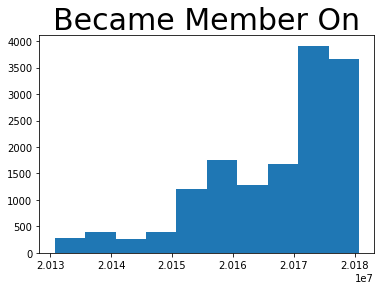

In [23]:
plt.title("Became Member On", fontsize=30)
plt.hist(final_profile['became_member_on'])
plt.show()

> 점점 회원수는 증가세를 보이다가 2017년에서 2018년으로 넘어갈 때 급격한 증가를 보입니다.

#### 수입에 대한 분석

In [24]:
income = final_profile['income'][1:]
income.value_counts()
#set(final_profile['income'])

73000.0     314
72000.0     297
71000.0     294
57000.0     288
53000.0     282
           ... 
116000.0     46
107000.0     45
112000.0     44
117000.0     32
120000.0     13
Name: income, Length: 91, dtype: int64

평균 수입은 : 65404.9915682968


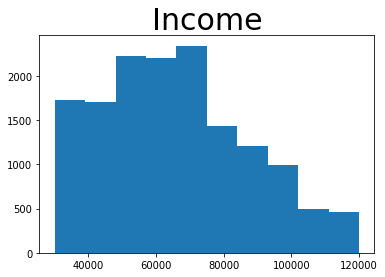

In [25]:
plt.title("Income", fontsize=30)
plt.hist(final_profile['income'])
print("평균 수입은 : {}".format(final_profile['income'].mean()))
plt.show()

> 50000 ~ 70000 사이의 수입이 있는 회원 비중이 높습니다. 그리고 40000이상 80000이하의 수입인 회원 비중이 과반 이상을 차지합니다. 평균 수입은 약 65404입니다.

#### profile 데이터에 대한 상관관계 분석

In [26]:
#df = final_profile.drop(['Unnamed : 0'], axis = 1)
#df
#final_profile = df.drop(['id'], axis = 1)
#final_profile
final_profile.corr()

,Unnamed: 0,age,became_member_on,income
Unnamed: 0,1.000000,-0.010011,0.008228,-0.008971
age,-0.010011,1.000000,-0.013425,0.306703
became_member_on,0.008228,-0.013425,1.000000,-0.029009
income,-0.008971,0.306703,-0.029009,1.000000


> 나이와 수입은 양의 관계입니다.

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

#### event에 대한 분석

In [27]:
#final_transcript
#df = final_transcript.drop(['Unnamed: 0'], axis = 1)
#df
#final_transcript = df.drop(['person'], axis = 1)
#final_transcript
#final_transcript['event']
event = final_transcript['event'][1:]
#event.value_counts()
set(final_transcript['event'])

{'offer completed', 'offer received', 'offer viewed', 'transaction'}

<AxesSubplot:title={'center':'Event'}, xlabel='event', ylabel='count'>

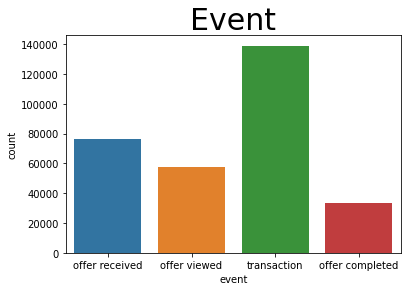

In [28]:
plt.title("Event", fontsize=30)
sns.countplot(data=final_transcript, x=event)

> 총 4개의 이벤트 중에서 'transaction'(아마도 거래까지) 진행된 수가 가장 높습니다.

#### time에 대한 분석

In [29]:
time = final_transcript['time'][1:]
time.value_counts()
#set(final_transcript['time'])

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

In [30]:
final_transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


<AxesSubplot:title={'center':'Time'}, xlabel='event', ylabel='time'>

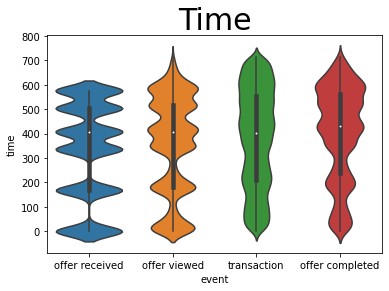

In [31]:
plt.title("Time", fontsize=30)
sns.violinplot(data=time, x=event, y=time)

> 'offer received'에 걸린 시간은 0, 200 이하, 그리고 300 ~ 600입니다.

> 'offer viewed'에 걸린 시간은 'offer received'보다 개수는 적지만 비교적 비슷한 시간이 걸리고 있습니다.

> 'transaction'은 다른 event에 비해 각 걸린 시간에 대하여 비교적 완만한 차이를 보입니다.

> 'offer completed'에 걸린 시간은 'offer viewed'와 비슷하게 시간이 걸리지만 약 400 ~ 600 구간에서 'offer viewed'에 비해 각 구간에 대하여 완만한 차이를 보이고 있습니다.

#### (Advanced, optional) value에 대한 분석 

In [32]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [33]:
list(transcript.value[0].keys())[0]

'offer id'

In [34]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,Unnamed: 0,person,event,value,time,value_key,value_value
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


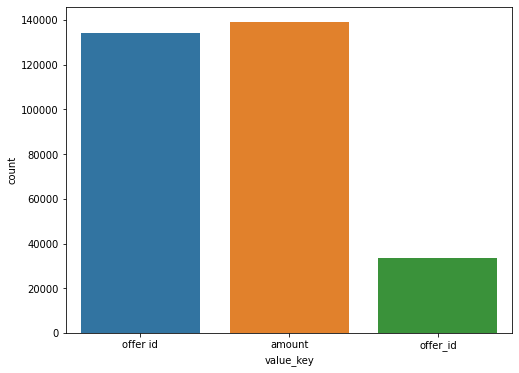

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

> 'transaction'으로 이루어진 'amount'수가 여타 'offer'관련 구분들의 'id'수 보다 많은 것을 통해 'transaction'은 'offer'로부터 받는 영향 없이 다수 이루어지고 있었습니다.

In [36]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [37]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [38]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [39]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

,id,Unnamed: 0,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,9,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount


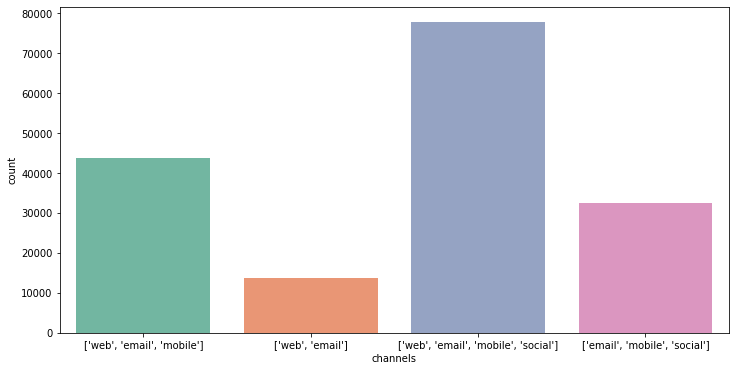

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()

> 'offer'를 제공하는 'channel'이 다양할수록 그 수도 다수를 차지하고 있습니다.

### 5. 분석 결과


> 설문에 참여한 스타벅스 회원에 따르면, 회원 중 남성이 과반수 이상이었습니다. 전체 성별에 대해 평균 나이는 대략 54세이며 수입은 약 40000 이상 80000 이하가 과반수를 차지하고 평균 수입은 65404입니다.

> 'offer_viewed'와 'offer_completed'는 걸리는 시간에 있어서 비슷한 양상을 보입니다. 하지만 'offer_viewed'에 비해 'offer_completed'수가 적은 것을 통하여 view가 complete으로 이어지기엔 한계가 있는 것을 알 수 있습니다.

> event 중 각 'offer'관련 건수와 달리 'transaction'의 건수가 가장 높으며 이는 'offer'관련 모든 event를 합친 수보다 많습니다. 이를 통해 'transaction'은 'offer'관련 event의 영향에 크게 반응하지 않고 발생하며 스타벅스에 충성도가 높은 회원들이 많은 것을 알 수 있습니다.